In [11]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [6]:
def linear_beta_schedule(timesteps):
    """
    linear schedule, proposed in original ddpm paper
    """
    scale = 1000 / timesteps
    beta_start = scale * 0.0001
    beta_end = scale * 0.02
    return torch.linspace(beta_start, beta_end, timesteps, dtype = torch.float64)

## step별 alpha  

In [101]:
beta_schedule_fn = linear_beta_schedule
timesteps = 1000

betas = beta_schedule_fn(timesteps)
alphas = 1. - betas

alphas_cumprod = torch.cumprod(alphas, dim=0)   # 원소들의 누적 곱 계산 함수
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value = 1.)


## shceduler에 의한 기본 coarse to fine setting

Text(850.0, 0.61, 'Coarse')

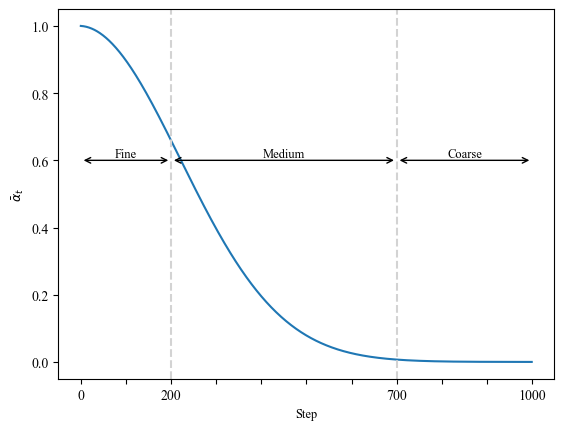

In [104]:
x = np.arange(1000).tolist()
plt.plot(x, alphas_cumprod_prev.tolist())
plt.xticks(np.arange(0, 1100, 100), labels=['0','','200','','','','','700','','','1000'])
plt.xlabel('Step', fontdict={'family': 'Times New Roman', 'size':9})
plt.ylabel(r'$\bar \alpha_t$', fontdict={'family': 'Times New Roman', 'size':9})

# scheduler에 의한 기본 setting
plt.axvline(200, 0.0, 1.0, color='lightgray', linestyle='--')
plt.axvline(700, 0.0, 1.0, color='lightgray', linestyle='--')

fine_stmark=0
fine_enmark=200
med_stmark = 200
med_enmark=700
coarse_stmark=700
coarse_enmark=1000
ystmark=0.60

Fine=plt.annotate('', xy=(fine_stmark, ystmark), xycoords='data',
				xytext=(fine_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Fine',xy=(((fine_enmark+fine_stmark)/2), ystmark+0.01), xycoords='data',fontsize=9.,textcoords='data',ha='center')

Med=plt.annotate('', xy=(med_stmark, ystmark), xycoords='data',
				xytext=(med_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Medium',xy=(((med_enmark+med_stmark)/2), ystmark+0.01), xycoords='data',fontsize=9.,textcoords='data',ha='center')

Coarse=plt.annotate('', xy=(coarse_stmark, ystmark), xycoords='data',
				xytext=(coarse_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Coarse',xy=(((coarse_enmark+coarse_stmark)/2), ystmark+0.01), xycoords='data',fontsize=9.,textcoords='data',ha='center')

## 구간 화살표

In [103]:
fine_stmark=0
fine_enmark=200
med_stmark = 200
med_enmark=700
coarse_stmark=700
coarse_enmark=1000
ystmark=0.60

Fine=plt.annotate('', xy=(fine_stmark, ystmark), xycoords='data',
				xytext=(fine_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Fine',xy=(((fine_enmark+fine_stmark)/2), ystmark+0.01), xycoords='data',fontsize=9.,textcoords='data',ha='center')

Med=plt.annotate('', xy=(med_stmark, ystmark), xycoords='data',
				xytext=(med_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Medium',xy=(((med_enmark+med_stmark)/2), ystmark+0.01), xycoords='data',fontsize=9.,textcoords='data',ha='center')

Coarse=plt.annotate('', xy=(coarse_stmark, ystmark), xycoords='data',
				xytext=(coarse_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Coarse',xy=(((coarse_enmark+coarse_stmark)/2), ystmark+0.01), xycoords='data',fontsize=9.,textcoords='data',ha='center')

Text(850.0, 0.61, 'Coarse')

ValueError: Image size of 99247x418 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

## source image latent에 의한 구간 조정

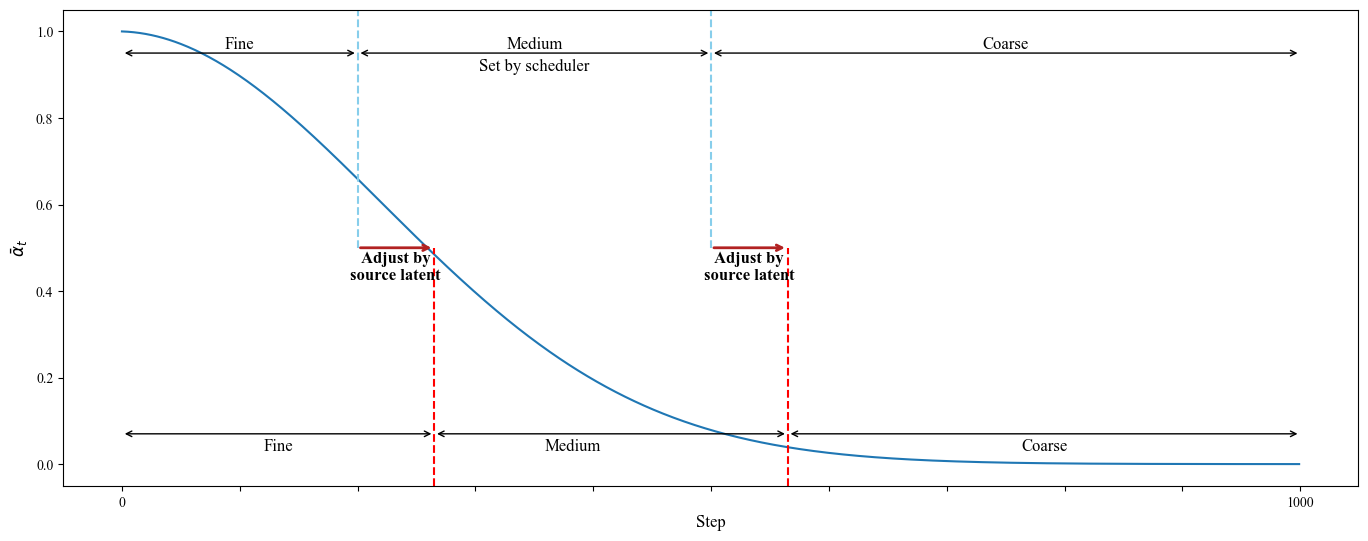

In [239]:
x = np.arange(1000).tolist()
f_size = 12
plt.figure(figsize=(6.89*2,2*6.89*0.4))
plt.plot(x, alphas_cumprod_prev.tolist())
plt.xticks(np.arange(0, 1100, 100), labels=['0','','','','','','','','','','1000'])
plt.xlabel('Step', fontdict={'family': 'Times New Roman', 'size':f_size})
plt.ylabel(r'$\bar \alpha_t$', fontdict={'family': 'Times New Roman', 'size':f_size})

fine_stmark=0
fine_enmark=200
med_stmark = 200
med_enmark=500
coarse_stmark=500
coarse_enmark=1000

adjust = 65

# plt.hlines(0.5, 0, 1000, color='lightgray', linestyle='solid')
# scheduler에 의한 기본 setting
plt.axvline(fine_enmark, 0.5, 1.0, color='skyblue', linestyle='--')
plt.axvline(med_enmark, 0.5, 1.0, color='skyblue', linestyle='--')

plt.axvline(fine_enmark+adjust, 0.0, 0.5, color='red', linestyle='--')
plt.axvline(coarse_stmark+adjust, 0.0, 0.5, color='red', linestyle='--')


# ystmark = 0.95
# plt.annotate('Set by\nscheduler',xy=(((med_enmark+med_stmark)/2), ystmark-0.03), xycoords='data',fontsize=f_size, textcoords='data',ha='center')
# Fine=plt.annotate('', xy=(med_stmark, ystmark), xycoords='data',
# 				xytext=(med_stmark+200, ystmark),textcoords='data',
# 				arrowprops=dict(arrowstyle="->"), va='center')
# Fine=plt.annotate('', xy=(coarse_stmark-200, ystmark), xycoords='data',
# 				xytext=(coarse_stmark, ystmark),textcoords='data',
# 				arrowprops=dict(arrowstyle="<-"), va='center')


ystmark=0.95
Fine=plt.annotate('', xy=(fine_stmark, ystmark), xycoords='data',
				xytext=(fine_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Fine',xy=(((fine_enmark+fine_stmark)/2), ystmark+0.01), xycoords='data',fontsize=f_size, textcoords='data',ha='center')

Med=plt.annotate('', xy=(med_stmark, ystmark), xycoords='data',
				xytext=(med_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Medium',xy=(((med_enmark+med_stmark)/2), ystmark+0.01), xycoords='data',fontsize=f_size, textcoords='data',ha='center')
plt.annotate('Set by scheduler',xy=(((med_enmark+med_stmark)/2), ystmark-0.04), xycoords='data',fontsize=f_size, textcoords='data',ha='center')

Coarse=plt.annotate('', xy=(coarse_stmark, ystmark), xycoords='data',
				xytext=(coarse_enmark, ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Coarse',xy=(((coarse_enmark+coarse_stmark)/2), ystmark+0.01), xycoords='data',fontsize=f_size, textcoords='data',ha='center')

A_ystmark = 0.5
A_Fine=plt.annotate('', xy=(fine_enmark, A_ystmark), xycoords='data',
				xytext=(fine_enmark+adjust, A_ystmark),textcoords='data',
				arrowprops=dict(color='firebrick', arrowstyle="<-",lw=2), va='center')
# plt.annotate('Adjust by\nsource latent',xy=((fine_enmark-40, A_ystmark-0.02)), xycoords='data',fontsize=f_size, textcoords='data',ha='center', weight='bold')
plt.annotate('Adjust by\nsource latent',xy=(((fine_enmark+adjust+fine_enmark)//2, A_ystmark-0.075)), xycoords='data',fontsize=f_size, textcoords='data',ha='center', weight='bold')

A_Coarse=plt.annotate('', xy=(coarse_stmark, A_ystmark), xycoords='data',
				xytext=(coarse_stmark+adjust, A_ystmark),textcoords='data',
				arrowprops=dict(color='firebrick', arrowstyle="<-", lw=2), va='center')
# plt.annotate('Adjust by\nsource latent',xy=((coarse_stmark-40, A_ystmark-0.02)), xycoords='data',fontsize=f_size, textcoords='data',ha='center', weight='bold')
plt.annotate('Adjust by\nsource latent',xy=(((coarse_stmark+coarse_stmark+adjust)//2, A_ystmark-0.075)), xycoords='data',fontsize=f_size, textcoords='data',ha='center', weight='bold')



r_ystmark = 0.07
Fine=plt.annotate('', xy=(fine_stmark, r_ystmark), xycoords='data',
				xytext=(fine_enmark+adjust, r_ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Fine',xy=(((fine_enmark+fine_stmark+adjust)/2), r_ystmark-0.04), xycoords='data',fontsize=f_size, textcoords='data',ha='center')

Med=plt.annotate('', xy=(med_stmark+adjust, r_ystmark), xycoords='data',
				xytext=(med_enmark+adjust, r_ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Medium',xy=(((med_enmark+med_stmark+adjust)/2), r_ystmark-0.04), xycoords='data',fontsize=f_size, textcoords='data',ha='center')

Coarse=plt.annotate('', xy=(coarse_stmark+adjust, r_ystmark), xycoords='data',
				xytext=(coarse_enmark, r_ystmark),textcoords='data',
				arrowprops=dict(arrowstyle="<->"), va='center')
plt.annotate('Coarse',xy=(((coarse_enmark+coarse_stmark+adjust)/2), r_ystmark-0.04), xycoords='data',fontsize=f_size, textcoords='data',ha='center')

plt.tight_layout()
plt.savefig('alphas.png')


<Figure size 640x480 with 0 Axes>